### Basics


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/anirudhsardiwal/Mileage-Prediction-App/refs/heads/main/auto-mpg.csv")

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
df['displacement'].mean()

193.42587939698493

In [10]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [13]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [14]:
df["horsepower"] = df["horsepower"].replace("?", np.nan)

In [15]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

In [16]:
df["make"] = df["car name"].apply(lambda x: x.split()[0])

In [17]:
df["make"].value_counts()

,count
make,
ford,51
chevrolet,43
plymouth,31
amc,28
dodge,28
toyota,25
datsun,23
buick,17
pontiac,16


In [18]:
df["make"] = df["make"].replace(
    {
        "chevy": "chevrolet",
        "chevroelt": "chevrolet",
        "maxda": "mazda",
        "mercedes-benz": "mercedes",
        "toyouta": "toyota",
        "vokswagen": "volkswagen",
        "vw": "volkswagen",
    }
)

In [19]:
df = df.drop("car name", axis=1)

In [20]:
df["origin"] = df["origin"].replace({1: "america", 2: "europe", 3: "asia"})

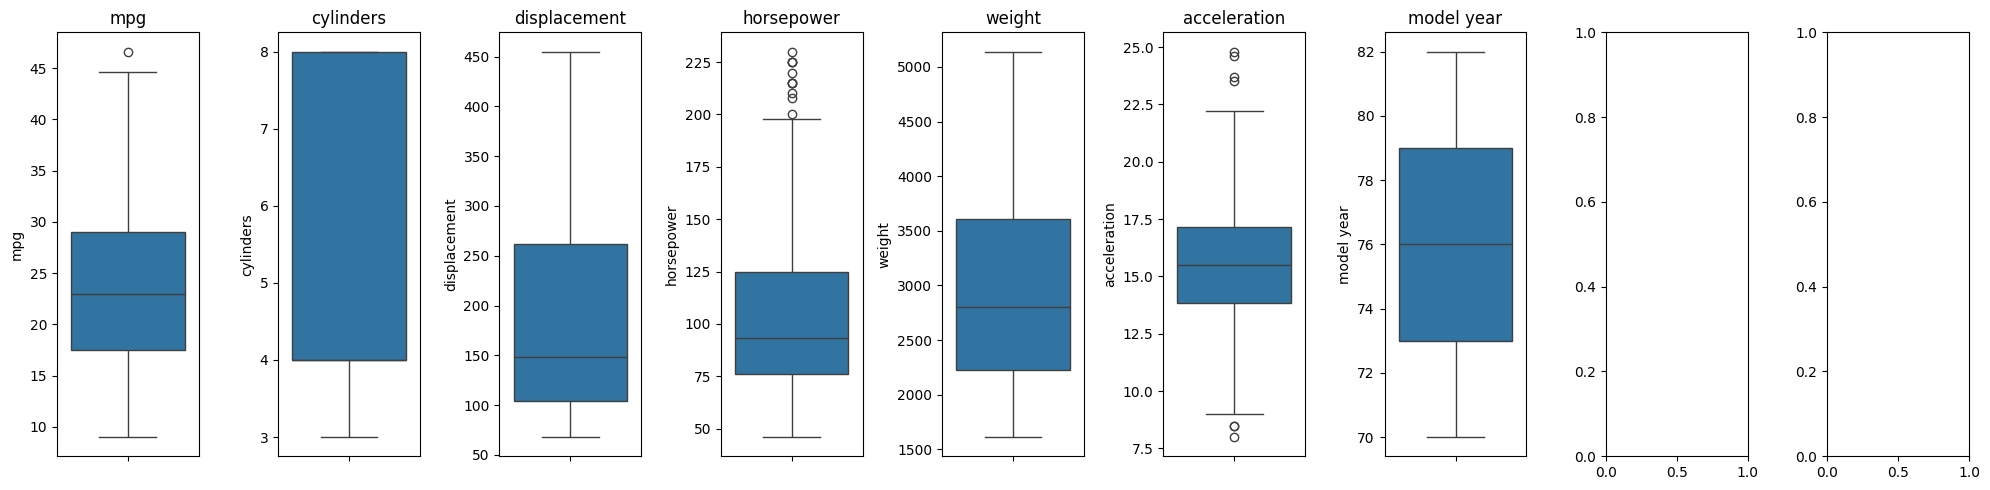

In [21]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(20, 5))
for i, col in enumerate(df.columns):
    if df[col].dtype != "object":
        sns.boxplot(y=col, data=df, ax=axes[i])
        axes[i].set_title(col)
plt.tight_layout()

### Encoding and Split


In [22]:
dfEncoded = pd.get_dummies(df, drop_first=True)

In [23]:
dfEncoded.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin_asia', 'origin_europe',
       'make_audi', 'make_bmw', 'make_buick', 'make_cadillac', 'make_capri',
       'make_chevrolet', 'make_chrysler', 'make_datsun', 'make_dodge',
       'make_fiat', 'make_ford', 'make_hi', 'make_honda', 'make_mazda',
       'make_mercedes', 'make_mercury', 'make_nissan', 'make_oldsmobile',
       'make_opel', 'make_peugeot', 'make_plymouth', 'make_pontiac',
       'make_renault', 'make_saab', 'make_subaru', 'make_toyota',
       'make_triumph', 'make_volkswagen', 'make_volvo'],
      dtype='object')

In [24]:
origin_encoded = pd.get_dummies(df["origin"],prefix='origin', drop_first=True)
origin_encoded

,origin_asia,origin_europe
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
393,False,False
394,False,True
395,False,False
396,False,False


In [25]:
dfEncoded

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe,make_audi,...,make_peugeot,make_plymouth,make_pontiac,make_renault,make_saab,make_subaru,make_toyota,make_triumph,make_volkswagen,make_volvo
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,False,False,False,...,False,False,False,False,False,False,False,False,False,False
394,44.0,4,97.0,52.0,2130,24.6,82,False,True,False,...,False,False,False,False,False,False,False,False,True,False
395,32.0,4,135.0,84.0,2295,11.6,82,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396,28.0,4,120.0,79.0,2625,18.6,82,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
pd.set_option('future.no_silent_downcasting', True)

In [27]:
dfEncoded = dfEncoded.replace({False: 0, True: 1})

In [28]:
X = dfEncoded.drop("mpg", axis=1)
y = dfEncoded["mpg"]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
X_test.to_csv("Mileage_test.csv", index=False)

In [32]:
df.to_csv("Mileage_raw_test.csv", index=False)

In [33]:
dfEncoded.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin_asia', 'origin_europe',
       'make_audi', 'make_bmw', 'make_buick', 'make_cadillac', 'make_capri',
       'make_chevrolet', 'make_chrysler', 'make_datsun', 'make_dodge',
       'make_fiat', 'make_ford', 'make_hi', 'make_honda', 'make_mazda',
       'make_mercedes', 'make_mercury', 'make_nissan', 'make_oldsmobile',
       'make_opel', 'make_peugeot', 'make_plymouth', 'make_pontiac',
       'make_renault', 'make_saab', 'make_subaru', 'make_toyota',
       'make_triumph', 'make_volkswagen', 'make_volvo'],
      dtype='object')

In [34]:
make_mapping = {
        "amc": 0, "audi": 1, "bmw": 2, "buick": 3, "cadillac": 4, "capri": 5,
        "chevrolet": 6, "chrysler": 7, "datsun": 8, "dodge": 9, "fiat": 10,
        "ford": 11, "hi": 12, "honda": 13, "mazda": 14, "mercedes": 15,
        "mercury": 16, "oldsmobile": 17, "peugeot": 18, "plymouth": 19,
        "pontiac": 20, "renault": 21, "saab": 22, "subaru": 23, "toyota": 24,
        "triumph": 25, "volkswagen": 26, "volvo": 27
    }

In [35]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin_asia', 'origin_europe', 'make_audi', 'make_bmw',
       'make_buick', 'make_cadillac', 'make_capri', 'make_chevrolet',
       'make_chrysler', 'make_datsun', 'make_dodge', 'make_fiat', 'make_ford',
       'make_hi', 'make_honda', 'make_mazda', 'make_mercedes', 'make_mercury',
       'make_nissan', 'make_oldsmobile', 'make_opel', 'make_peugeot',
       'make_plymouth', 'make_pontiac', 'make_renault', 'make_saab',
       'make_subaru', 'make_toyota', 'make_triumph', 'make_volkswagen',
       'make_volvo'],
      dtype='object')

### Models Loop

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Polynomial 3": PolynomialFeatures(degree=3),
    "Support Vector": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
}


In [ ]:
models.items()

dict_items([('Linear', LinearRegression()), ('Ridge', Ridge()), ('Lasso', Lasso()), ('Polynomial 3', PolynomialFeatures(degree=3)), ('Support Vector', SVR()), ('Decision Tree', DecisionTreeRegressor()), ('Random Forest', RandomForestRegressor()), ('Gradient Boosting', GradientBoostingRegressor()), ('AdaBoost', AdaBoostRegressor()), ('K-Nearest Neighbors', KNeighborsRegressor())])

In [ ]:
results = []

In [ ]:
for name, model in models.items():
    if name == "Polynomial 3":
        poly = PolynomialFeatures(degree=3)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        lin_reg = LinearRegression()
        lin_reg.fit(X_train_poly, y_train)
        y_pred = lin_reg.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "RMSE": rmse, "R2": r2})

In [ ]:
results_df = pd.DataFrame(results)

In [ ]:
results_df[["RMSE", "R2"]] = results_df[["RMSE", "R2"]].map(lambda x: f"{x:.2f}")

In [ ]:
results_df

,Model,RMSE,R2
0,Linear,3.12,0.82
1,Ridge,3.01,0.83
2,Lasso,3.02,0.83
3,Polynomial 3,102.90,-195.94
4,Support Vector,3.72,0.74
5,Decision Tree,3.36,0.79
6,Random Forest,2.16,0.91
7,Gradient Boosting,2.39,0.89
8,AdaBoost,2.62,0.87
9,K-Nearest Neighbors,3.55,0.77


### Selected Model


In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
model_rf = RandomForestRegressor()

In [40]:
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
y_pred = model_rf.predict(X_test)

### Streamlit application work

In [45]:
df_pred = pd.DataFrame(columns=X_train.columns)

In [46]:
mileage_test = pd.read_csv('https://raw.githubusercontent.com/anirudhsardiwal/Mileage-Prediction-App/refs/heads/main/Mileage_raw_test.csv')

In [47]:
# mileage_test.to_csv('Mileage_raw_test.csv', index=False)

In [48]:
df_pred.iloc[:,0:6] = mileage_test.iloc[:,0:6]

In [49]:
df_pred = df_pred.fillna(0)

In [50]:
df_pred.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe,make_audi,make_bmw,...,make_peugeot,make_plymouth,make_pontiac,make_renault,make_saab,make_subaru,make_toyota,make_triumph,make_volkswagen,make_volvo
0,8,307.0,130.0,3504,12.0,70,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,350.0,165.0,3693,11.5,70,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,318.0,150.0,3436,11.0,70,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,304.0,150.0,3433,12.0,70,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,302.0,140.0,3449,10.5,70,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
mileage_test.shape

(398, 8)

In [58]:
for i in range(0,mileage_test.shape[0]):
    if 'origin_' + mileage_test.loc[i,'origin'] in df_pred.columns:
        df_pred.loc[i,'origin_' + mileage_test.loc[i,'origin']] = 1
    if 'make_' + mileage_test.loc[i,'make'] in df_pred.columns:
        df_pred.loc[i,'make_' + mileage_test.loc[i,'make']] = 1

In [53]:
mileage_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,make
0,8,307.0,130.0,3504,12.0,70,america,chevrolet
1,8,350.0,165.0,3693,11.5,70,america,buick
2,8,318.0,150.0,3436,11.0,70,america,plymouth
3,8,304.0,150.0,3433,12.0,70,america,amc
4,8,302.0,140.0,3449,10.5,70,america,ford


In [59]:
df_pred.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_asia,origin_europe,make_audi,make_bmw,...,make_peugeot,make_plymouth,make_pontiac,make_renault,make_saab,make_subaru,make_toyota,make_triumph,make_volkswagen,make_volvo
0,8,307.0,130.0,3504,12.0,70,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,350.0,165.0,3693,11.5,70,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,318.0,150.0,3436,11.0,70,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,8,304.0,150.0,3433,12.0,70,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,302.0,140.0,3449,10.5,70,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature Importances

In [54]:
feature_importances = pd.DataFrame(
    {"Feature": X.columns, "Importance": model_rf.feature_importances_}
).sort_values("Importance", ascending=False)

In [55]:
feature_importances

,Feature,Importance
1,displacement,0.366582
0,cylinders,0.187340
3,weight,0.147904
2,horsepower,0.135420
5,model year,0.113861
4,acceleration,0.024091
25,make_oldsmobile,0.003606
15,make_datsun,0.002679
7,origin_europe,0.002505
35,make_volkswagen,0.002469


In [56]:
origin_importance = feature_importances[
    feature_importances["Feature"].str.startswith("origin_")
]["Importance"].sum()
make_importance = feature_importances[
    feature_importances["Feature"].str.startswith("make_")
]["Importance"].sum()

In [57]:
print(f"Origin importance: {origin_importance}")
print(f"Make importance: {make_importance}")

Origin importance: 0.004661332626098925
Make importance: 0.020140080384881347


### Exporting the Model


In [ ]:
import pickle

In [ ]:
pickle_out = open("mileage_prediction_model.pkl", "wb")
pickle.dump(model_rf, pickle_out)